### Iris flowers dataset in scikit-learn
<B>Features</b> consist of four measurements pertaining to iris flowers: petal length, petal width, sepal length, and sepal width.<br>The <b>target variable</b> encodes the species of flower and there are three possibilities: 'versicolor', 'virginica', and 'setosa'.
https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=3

In [1]:
# The Iris dataset in scikit-learn
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
iris = datasets.load_iris()

#### Exploratory data analysis (EDA)

In [2]:
type(iris) # Bunch is similar to a dictionary: contains key-value pairs

sklearn.utils.Bunch

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Both the feature and target data are provided as NumPy arrays.

In [6]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

We have 150 samples (rows) and the four features (columns): petal length and width and sepal length and width.

In [7]:
iris.data.shape

(150, 4)

The target variable is encoded as 0 for "setosa", 1 for "versicolor" and 2 for "virginica":

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

To perform some initial EDA, we'll assign the feature and target data to X and y, respectively. We'll then build a DataFrame of the feature data using pd.DataFrame and also passing column names. Viewing the head of the data frame shows us the first five rows.

In [9]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Visual EDA
Now, we'll do a bit of visual EDA. We use the pandas function scatter matrix to visualize our dataset. We pass it the our DataFrame, along with our target variable as argument to the parameter c, which stands for color, ensuring that our data points in our figure will be colored by their species. We also pass a list to figsize, which specifies the size of our figure, as well as a marker size and shape.

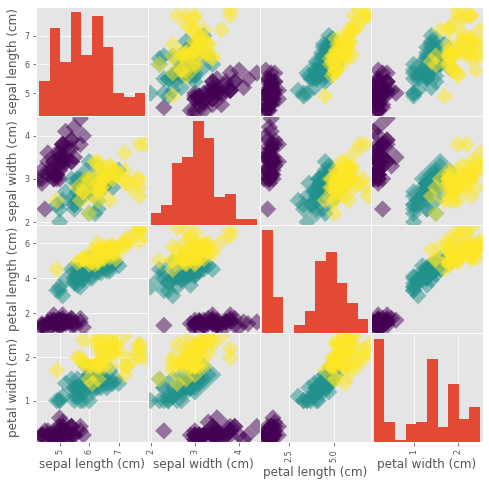

In [9]:
_ = pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8], s = 150, marker = 'D')
# on the diagonal - histogram of feature

The result is a matrix of figures, where on the diagonal we have histograms of the features corresponding to the row and column, and the off-diagonal figures are scatter plots of the column feature (x) versus row feature (y) colored by the target variable.
    We can see that petal width and length are highly correlated, as one may expect, and that flowers are clustered according to species.

### Classification challenge
We have a set of labeled data and we want to build a classifier that takes unlabeled data as input and outputs a label. So how do we construct this classifier? We first need to choose a type of classifier and it needs to learn from the already labeled data. For this reason, we call the already labeled data the training data. So let's build our classifier!

#### Scikit-learn fit and predict
All machine learning models in scikit-learn are implemented as python classes. These classes serve two purposes: they implement the algorithms for learning a model, and predicting, while also storing all the information that is learned from the data. Training a model on the data is also called fitting the model to the data. In scikit-learn, we use the `fit` method to do this. Similarly, the `predict` method is what we use to predict the label of an unlabeled data point.

#### k-Nearest Neighbors
We'll choose a simple algorithm called K-nearest neighbors. The basic idea of K-nearest neighbors, or KNN, is to predict the label of any data point by looking at the K closest labeled data points and getting them to vote on what label the unlabeled point should have. KNN algorithm essentially creates a set of decision boundaries.

We import and then instantiate our KNeighborsClassifier, set the number of neighbors equal to 6, and assign it to the variable knn. Then we can fit this classifier to our training set, the labeled data. To do so, we apply the method fit to the classifier and pass it two arguments: the features as a NumPy array and the labels, or target, as a NumPy array. The scikit-learn API requires firstly that you have the data as a NumPy array or pandas DataFrame. It also requires that the features take on continuous values, such as the price of a house, as opposed to categories, such as 'male' or 'female'. It also requires that there are no missing values in the data. In particular, the scikit-learn API requires that the features are in an array where each column is a feature and each row a different observation or data point. Looking at the shape of iris data, we see that there are 150 observations of four features. Similarly, the target needs to be a single column with the same number of observations as the feature data. We see in this case there are indeed also 150 labels.

In [10]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(iris['data'], iris['target']) # features must be continuous, no missing values. Fit on entire dataset

KNeighborsClassifier(n_neighbors=6)

Also check out what is returned when we fit the classifier: it returns the classifier itself and modifies it to fit it to the data. Now that we have fit our classifier, lets use it to predict on some unlabeled data!
#### Predicting on unlabeled data
Here we have set of observations, `X_new`.

In [11]:
X_new = np.array([[5.6, 2.8, 3.9, 1.1],[5.7, 2.6, 3.8, 1.3],[4.7, 3.2, 1.3, 0.2]])
X_new.shape # 3 observations and 4 features

(3, 4)

We use the `predict` method on the classifier and pass it the data.

In [12]:
prediction = knn.predict(X_new) # 3-by-1 array with a prediction for each observation (row) in X_new
print('Prediction: {}'.format(prediction)) # 'versicolor', 'versicolor', 'setosa'

Prediction: [1 1 0]


#### Measuring model performance
https://campus.datacamp.com/courses/supervised-learning-with-scikit-learn/classification?ex=9
Now that we know how to fit a classifier and use it to predict the labels of previously unseen data, we need to figure out how to measure its performance. That is, we need a metric. In classification problems, accuracy is a commonly-used metric. The <b>accuracy</b> of a classifier is defined as the number of correct predictions divided by the total number of data points. This begs the question though: which data do we use to compute accuracy? What we are really interested in is how well our model will perform on new data, that is, samples that the algorithm has never seen before.

Well, you could compute the accuracy on the data you used to fit the classifier. However, as this data was used to train it, the classifier's performance will not be indicative of how well it can generalize to unseen data. For this reason, it is common practice to split your data into two sets, a training set and a test set. You train or fit the classifier on the training set. Then you make predictions on the labeled test set and compare these predictions with the known labels. You then compute the accuracy of your predictions.

#### Train/test split
To do this, we first import train test split from sklearn.model_selection. We then use the train test split function to randomly split our data. The first argument will be the feature data, the second the targets or labels. The test size keyword argument specifies what proportion of the original data is used for the test set. Lastly, the `random_state` keyword argument sets a seed for the random number generator that splits the data into train and test. Setting the seed with the same argument later will allow you to reproduce the exact split and your downstream results. Train-test split returns four arrays: the training data, the test data, the training labels, and the test labels. We unpack these into four variables: `X_train`, `X_test`, `y_train`, and `y_test`, respectively. By default, train test split splits the data into 75% training data and 25% test data, which is a good rule of thumb. We specify the size of the test size using the keyword argument `test_size`, which we do here to set it to 30%. It is also best practice to perform your split so that the split reflects the labels on your data. That is, you want the labels to be distributed in train and test sets as they are in the original dataset. To achieve this, we use the keyword argument `stratify=y`, where `y` is the list or array containing the labels. We then instantiate our K-nearest neighbors classifier, fit it to the training data using the fit method, make our predictions on the test data and store the results as `y_pred`. Printing them shows that the predictions take on 45 values, as expected. To check out the accuracy of our model, we use the score method of the model and pass it `X_test` and `y_test`. See here that the accuracy of our K-nearest neighbors model is approximately 95.56%, which is pretty good for an out-of-the-box model!

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))
knn.score(X_test, y_test) # mean accuracy on the given test data and labels

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


0.9555555555555556

#### Model complexity and over/underfitting
For small K, the decision boundary is rough and can have islands. Generally, such complex models run the risk of being sensitive to noise in the specific data that you have, rather than reflecting general trends in the data. This is know as <b>overfitting</b>.

As K increases, the decision boundary gets smoother and less curvy. Therefore, we consider it to be a less complex model than those with a lower K. If you increase K even more and make the model even simpler, then the model will perform less well on both test and training sets, which is called <b>underfitting</b>.

We can choose the optimal number of neighbors K using the <b>model complexity curve</b>, which shows the training and testing accuracy scores for different K. There is a sweet spot in the middle that gives us the best performance on the test set.

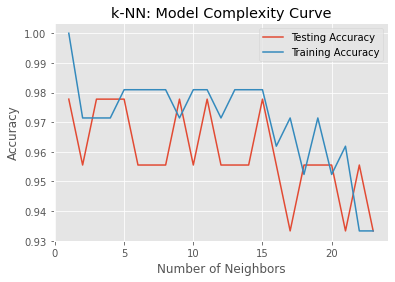

In [16]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 24)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Model Complexity Curve')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

The test accuracy is highest when using 1 or 3 to 5 neighbors. Using 6 neighbors or more seems to result in a simple model that underfits the data. By varying K, we increased the accuracy to 97.78%.

In [19]:
print("Highest accuracy =",test_accuracy[4])

Highest accuracy = 0.9777777777777777


<b>Q1: Would it still make sense to we choose: k = 15? </b>

## Cross-validation
The data points in the test set may have some peculiarities that mean the accuracy or another performance metric computed on it is not representative of the model's ability to generalize to unseen data. To combat this dependence on what is essentially an arbitrary split, we use a technique called cross-validation.

We begin by splitting the dataset into five groups or folds.
Then we hold out the first fold as a test set,
fit our model on the remaining four folds,
predict on the test set, and
compute the metric of interest.
Next, we hold out the
second fold as our test set,
fit on the remaining data,
predict on the test set, and
compute the metric of interest. Then similarly
with the third,
fourth, and
fifth fold.
As a result we get five values of R squared from which we can compute statistics of interest, such as the mean and median and 95% confidence intervals.

In [ ]:
from sklearn.model_selection import cross_val_score

In [25]:
knn

KNeighborsClassifier(n_neighbors=23)

In [26]:
cv_results = cross_val_score(knn, X, y, cv=5) # array of cross-validation scores R^2?
print(cv_results)
print(np.mean(cv_results))

[0.93333333 1.         0.93333333 0.93333333 1.        ]
0.96


In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
cv_results = cross_val_score(knn, X, y, cv=5) # array of cross-validation scores
print(cv_results)
print(np.mean(cv_results))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


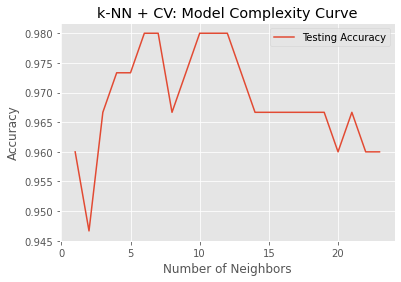

In [28]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 24)
train_accuracy_cv = np.empty(len(neighbors))
test_accuracy_cv = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data and Cross-Validate 
    cv_results = cross_val_score(knn, X, y, cv=5) # array of cross-validation scores

    #Compute accuracy in Cross-Validation
    test_accuracy_cv[i] = np.mean(cv_results)

# Generate plot
plt.title('k-NN + CV: Model Complexity Curve')
plt.plot(neighbors, test_accuracy_cv, label = 'Testing Accuracy')
#plt.plot(neighbors, train_accuracy_cv, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

<b>Q2: what to take as a test accuracy in this case?</b>